In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.getcwd()

'd:\\git_local_repository\\yangoos57\\ML\\Hands_On_Data_preprocessing_in_python\\Part3'

### Data fusion and Data integration
* Data fusion : 합치고자 하는 데이터 셋 간 data object(=row)가 일치되지 않은 경우에 자료를 합치는 경우를 말합니다.
  * Data fusion을 위해서는 Data object를 정의내려야 하고 자료가 합쳐질 수 있도록 공통된 가정들을 설립해야합니다. 

<br>

* Data integration : 합치고자 하는 데이터 셋 간 data object(=row)가 일치하는 경우에 자료를 합치는 경우를 말합니다. 
  * Data integration은 이미 data object간 정의가 완료된 상태이므로 합치는데 어려움이 없습니다. 다만 자료 중복이나 결측값 발생 경우를 유의해야 합니다.
  

### Frequent challanges regarding data fusion and integration

1. entity identification : 개별 row를 식별하기 힘들거나 unique identifier가 너무 많아서 데이터 셋이 난잡해지는 경우입니다.
   <br>
   
2. unwise data collection : 개별 data object를 하나의 테이블에 보관하지 않고 여러 파일로 분산해서 가지고 있는 경우입니다. ex) trump address
3. index mismatched formatting : data fusion시 data object 간 양식이 맞지 않거나 조금씩 불일치 되는 경우에 완벽히 통합되지 않는 경우입니다.
4. aggregation mismatch : 3번과 유사하지만 attribute와 관련된 내용입니다. 대상이 통합될 수 있도록 하나의 데이터 프레임 또는 모두를 건드려서 통합될 수 있도록 해야합니다.
5. duplicate data objects : 분산된 자료를 하나로 통합하다보면 중복되는 data object가 발생할 수 있습니다.
6. data redundancy : attribute에서 데이터가 중복되는 경우 입니다. shallow redundancy는 title이 같거나 내용이 똑같아서 구분하기 쉬운 경우를, deeper redundancy는 title이나 내용이 다르지만 다른 attribute로 부터 도출가능한 경우를 말합니다.

### Example 1(Challenges 3 and 4)

In [3]:
electric_df = pd.read_csv('data/ch12/Electricity Data 2016_2017.csv')

In [4]:
### Date와 Time 합치기
electric_df.Date = electric_df.Date +' '+ electric_df.Time

# 합친 Date Datetime으로 변환
electric_df.Date = pd.to_datetime(electric_df.Date)

# 2017년도 자료 제거 & Time 제거
electric_df.drop(electric_df[electric_df['Date'].dt.year == 2017].index, inplace= True)
electric_df.drop(columns=['Time'], inplace=True)

In [5]:
# 15분 term 자료 1시간으로 통합
hour_electric_df = electric_df.groupby([pd.Grouper(key='Date',freq='H')]).sum()

# multi-index 만들고 이름 부여하기
new_index = hour_electric_df.index.to_series().dt
hour_electric_df.set_index([new_index.month,new_index.day,new_index.time],inplace=True)
hour_electric_df.index.names =['month','day','time']

In [6]:
temp_df = pd.read_csv('data/ch12/Temperature 2016.csv')
### Datetime으로 변환
temp_df['Timestamp'] = pd.to_datetime(temp_df['Timestamp'])

# multi-index 만들고 이름 부여하기
new_index = temp_df['Timestamp'].dt
temp_df.set_index([new_index.month,new_index.day,new_index.time],inplace= True)
temp_df.index.names =['month','day','time']

# timestamp 제거하기
temp_df.drop(columns=['Timestamp'],inplace=True)

In [7]:
## hour_electric_dt와 temp_df 합치기
k = hour_electric_df.join(temp_df)

In [8]:
temp_df.head(5)
# plt.plot(temp_df.index,temp_df['temp'])
# sns.lineplot(data=temp_df, x = temp_df.index, y='temp')

temp
month day time          
1     1   00:00:00  79.0
          01:00:00  79.0
          02:00:00  77.5
          03:00:00  79.0
          04:00:00  77.0

In [9]:
zxc = hour_electric_df.reset_index()
zxc['timestamp'] ='2016-' + zxc['month'].astype(str) + '-' + zxc['day'].astype(str) + ' ' +zxc['time'].astype(str)
zxc['timestamp'] = pd.to_datetime(zxc['timestamp'])
zxc.drop(columns=['month','day','time'],inplace=True)
zxc.head()


,Consumption,timestamp
0,119052.0,2016-01-01 00:00:00
1,113138.0,2016-01-01 01:00:00
2,111013.0,2016-01-01 02:00:00
3,104808.0,2016-01-01 03:00:00
4,99552.0,2016-01-01 04:00:00


In [10]:
zxc.set_index('timestamp',inplace=True)
zxc

,Consumption
timestamp,
2016-01-01 00:00:00,119052.0
2016-01-01 01:00:00,113138.0
2016-01-01 02:00:00,111013.0
2016-01-01 03:00:00,104808.0
2016-01-01 04:00:00,99552.0
...,...
2016-12-31 19:00:00,154958.0
2016-12-31 20:00:00,149484.0
2016-12-31 21:00:00,143693.0


### 분해한 datetime 다시 통합하기

In [11]:
### index를 다시 column으로 위치시키기
asd = temp_df.reset_index()
### Timestamp 간단하게 만들기
# string으로 바꾼 다음에 datetime으로 만들면 어렵지 않다.
asd['timestamp'] ='2016-' + asd['month'].astype(str) + '-' + asd['day'].astype(str) + ' ' +asd['time'].astype(str)
asd['timestamp'] = pd.to_datetime(asd['timestamp'])

## 불필요한 column 지우기
asd.drop(columns=['month','day','time'],inplace=True)


In [12]:
# sns.lineplot(data = asd , x = 'timestamp', y ='temp')
### temp와 consumption 합치기 위해 index 통일하기
asd.set_index('timestamp',inplace=True)



In [13]:
## 통합
x = asd.join(zxc).reset_index()
x.head(10)

,timestamp,temp,Consumption
0,2016-01-01 00:00:00,79.0,119052.0
1,2016-01-01 01:00:00,79.0,113138.0
2,2016-01-01 02:00:00,77.5,111013.0
3,2016-01-01 03:00:00,79.0,104808.0
4,2016-01-01 04:00:00,77.0,99552.0
5,2016-01-01 05:00:00,77.0,97522.0
6,2016-01-01 06:00:00,77.0,97959.0
7,2016-01-01 07:00:00,77.0,98447.0
8,2016-01-01 08:00:00,80.5,98609.0
9,2016-01-01 09:00:00,82.0,98590.0


### Example 2 (Challenges 2 and 3)

In [14]:
unknown_df = pd.read_csv('data/ch12/Taekwondo_Technique_Classification_Stats.csv')
athelete_df = pd.read_csv('data/ch12/Table1.csv')


In [15]:
### Data fusion이 필요할 때는 새로운 dataframe을 만들어서 이곳에 자료를 저장하자.
designed_columns = ['participant_id', 'gender', 'age','weight','experience','technique_id', 'trial_number','average_read']

# 어떤 사람 한명이 기술 한 번을 시현하지 않아서 1개 뺐음
n_rows = len(unknown_df.columns) -1 

performance_df = pd.DataFrame(index=range(n_rows), columns=designed_columns)
performance_df

,participant_id,gender,age,weight,experience,technique_id,trial_number,average_read
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
### athelete_df 정리
athelete_df.set_index('Participant ID', inplace= True)
### 이름 정리
athelete_df.columns =['sex', 'age','weight','experience','belt']
athelete_df

,sex,age,weight,experience,belt
Participant ID,,,,,
P1,M,7,25,1,Green
P2,M,9,23,2,Red Stripe
P3,M,13,39,6,Black Stripe
P4,M,14,43,8,Black (Competitive)
P5,F,16,54,8,Black (Competitive)
P6,M,16,72,13,Black (Competitive)


In [17]:
# 행과 열을 바꿈
vert_unknown_df = unknown_df.T
#맨 위의 행을 column으로 사용함
vert_unknown_df.columns = vert_unknown_df.iloc[0]
# row를 제거할 땐 axis=0을 사용해야함.
vert_unknown_df.drop('Technique', axis=0, inplace=True)

In [18]:
vert_unknown_df.head(3)

Technique,ID,Trial #,Readings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R,P1,1,1026,1026,1026,1026,1026,1026,1026,1026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R.1,P1,2,1026,1028,1028,1028,1028,1028,1028,1028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R.2,P1,3,1026,1026,1026,1026,1027,1026,1026,1026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
### Nan 값 때문에 전체에 바로 적용하기 힘드므로 열 하나씩 불러와 개별적으로 평균을 낸 뒤 x에 저장
x=[]
for col in vert_unknown_df.index :
    BM = vert_unknown_df.loc[col].isna() == False
    k = vert_unknown_df.loc[col][BM][2:].astype(int).mean()
    x.append(k)

print(len(x))

115


In [20]:
### 가장 빠른 방법은 개별 column에 대해 리스트나 array로 넣는 것임.
performance_df['technique_id'] = vert_unknown_df.index
performance_df['participant_id'] = vert_unknown_df.iloc[: , 0].values 
performance_df['trial_number'] = vert_unknown_df.iloc[: , 1].values
performance_df['average_read'] = x
    


In [21]:
### 개별 값을 넣을 때는 loc를 사용해야한다. 
### loc를 쓸 때 index를 사용해야 정확히 들어가고 오류가 나지 않는다.
for i in performance_df['participant_id'].unique() :
    BM = performance_df['participant_id'] == i
    for num, col in enumerate(['gender', 'age', 'weight', 'experience']) : 
        # print(performance_df[BM][col])
        performance_df.loc[performance_df[BM].index, col] = athelete_df.loc[i][num]
        

In [22]:
performance_df.head(10)

,participant_id,gender,age,weight,experience,technique_id,trial_number,average_read
0,P1,M,7,25,1,R,1,1026.112369
1,P1,M,7,25,1,R.1,2,1026.154806
2,P1,M,7,25,1,R.2,3,1026.106672
3,P1,M,7,25,1,R.3,4,1026.123072
4,P1,M,7,25,1,R.4,5,1026.153216
5,P2,M,9,23,2,R.5,1,1026.303442
6,P2,M,9,23,2,R.6,2,1026.223410
7,P2,M,9,23,2,R.7,3,1026.314341
8,P2,M,9,23,2,R.8,4,1026.258959
9,P2,M,9,23,2,R.9,5,1026.350060


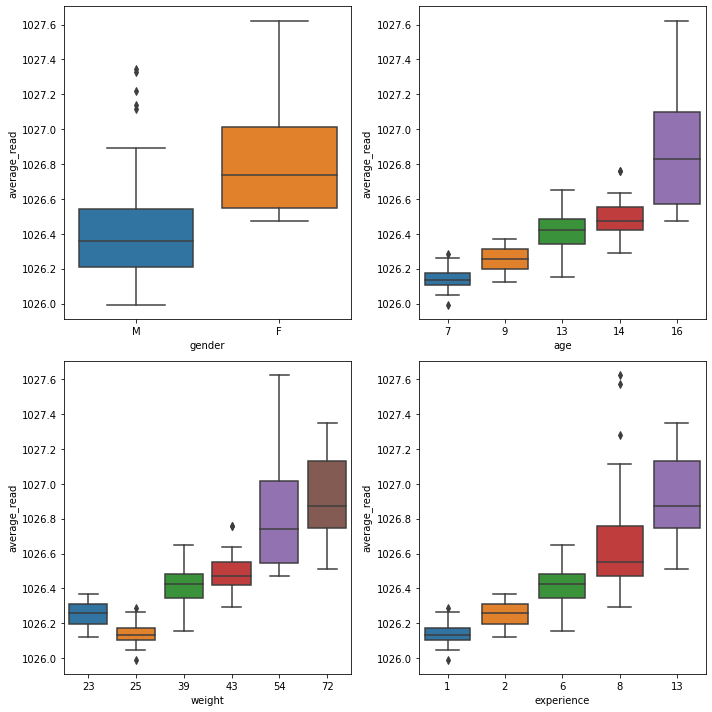

In [23]:
### sns Boxplot은 여러 대상을 비교할 때 매우 좋다! 
### pandas plot이나 matplotlib은 missing value를 찾을때 좋다!
plt.figure(figsize=(10,10))
for i, col in enumerate(['gender','age','weight','experience']) :
    plt.subplot(2,2,i+1)
    sns.boxplot(data=performance_df, x = col , y ='average_read')
plt.tight_layout()
plt.show()
    # for k in col.unique() :
    #     BM = performance_df[col] == k

In [24]:
### Technique id 바꾸기
x = performance_df['technique_id'].unique()

for a in ['R','B','C','P'] :
    for i, uni in enumerate(x) :
        if a in uni :
            performance_df.loc[i,'technique_id'] = a

<AxesSubplot:xlabel='experience', ylabel='average_read'>

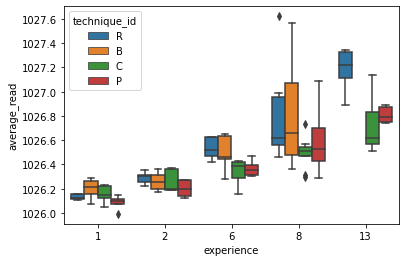

In [25]:
### Hue를 사용하면 3차원까지 그릴 수 있다. 
sns.boxplot(data=performance_df, y='average_read', x='experience', hue='technique_id')

### Example3(Challenges 1,3,5,6) => Decision Tree 항목으로

In [27]:
Q('D:/git_local_repository/billboardHot100_1999-2019.csv')
### 200mb ㄷㄷ

In [34]:
billboard_df.tail()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
97220,97221,Vitamin C,Smile,95,NaN,NaN,1999-07-12,NaN,"Jamaica,Pop","Colleen fitzpatrick, Josh deutsch","Smile \nHahaha\nAlright, yeah\nAlright\nFirst ...",Lady Saw
97221,97222,Collective Soul,Heavy,96,73.0,20.0,1999-07-12,NaN,"Hockey,Gaming,Soundtrack,Rock",Collective soul,Heavy \nComplicate this world you wrapped for ...,NaN
97222,97223,Mary Chapin Carpenter,Almost Home,97,NaN,NaN,1999-07-12,NaN,"Country,Pop","Annie roboff, Beth nielsen chapman, Mary chapi...",Almost Home \nI saw my life this morning\nLyin...,NaN
97223,97224,Q,Vivrant Thing,98,NaN,NaN,1999-07-12,NaN,Rap,"Q tip, J dilla, Barry white",Vivrant Thing \nUh check it out now\nUh no dou...,NaN
97224,97225,The Offspring,Why Don't You Get A Job?,100,74.0,15.0,1999-07-12,NaN,"Ska,Punk Rock,Rock",Dexter holland,Why Don't You Get a Job? \nMy friend's got a g...,NaN


In [32]:
songattribute_df = pd.read_csv('data/ch12/songAttributes_1999-2019.csv')
wsr = songattribute_df.apply(lambda r : '{}---{}'.format(r.Artist,r.Name), axis=1)
wsr.value_counts()

Jose Feliciano---Light My Fire                 21
Dave Matthews Band---Ants Marching - Live      18
Jose Feliciano---Rain                          15
Jose Feliciano---California Dreamin'           14
Jose Feliciano---La Bamba                      14
                                               ..
Elvis Presley---Let's Be Friends                1
Yo Gotti---9 to 5                               1
Chris Brown---Hands Up                          1
Lil' Kim---Answering Machine Skit 2             1
Willie Nelson---If I Can Find a Clean Shirt     1
Length: 131377, dtype: int64

In [35]:
songattribute_df

,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
0,0,0.000728,Collective Soul (Deluxe Version),Collective Soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,Welcome All Again,35,0.0309,106.022,4,0.365
1,1,0.018200,Collective Soul (Deluxe Version),Collective Soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,Fuzzy,31,0.0282,120.027,4,0.408
2,2,0.000473,Collective Soul (Deluxe Version),Collective Soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,Dig,30,0.0559,144.061,4,0.370
3,3,0.000970,Collective Soul (Deluxe Version),Collective Soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,You,35,0.0254,111.975,4,0.183
4,4,0.000036,Collective Soul (Deluxe Version),Collective Soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,My Days,21,0.0318,92.721,4,0.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154926,114,0.333000,No.6 Collaborations Project,Ed Sheeran,0.747,200733,0.649,False,0.000000,0.1720,-6.218,0,Nothing On You (feat. Paulo Londra & Dave),80,0.2190,88.011,4,0.840
154927,115,0.314000,No.6 Collaborations Project,Ed Sheeran,0.469,204507,0.631,False,0.000000,0.1400,-6.569,0,I Don't Want Your Money (feat. H.E.R.),74,0.0853,91.418,4,0.763
154928,116,0.467000,No.6 Collaborations Project,Ed Sheeran,0.778,212307,0.590,False,0.000000,0.0902,-5.548,1,1000 Nights (feat. Meek Mill & A Boogie Wit da...,75,0.2700,97.995,4,0.515
154929,117,0.110000,No.6 Collaborations Project,Ed Sheeran,0.726,190293,0.731,False,0.000003,0.0928,-6.304,0,Way To Break My Heart (feat. Skrillex),73,0.1590,170.125,4,0.430
